<a href="https://colab.research.google.com/github/jhee086/Machine_Learning_Basics-Inflearn/blob/main/Titanic(Data_Preprocessing)_20220226.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[kaggle titanic data link](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (4).csv
Saving test.csv to test (3).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
# train dataset 불러오고 dataframe으로 변환

train = df
print(train)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [ ]:
dfO = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

test = dfO
print(test)

     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


1. NaN : 결측값
2. male, female 상태로 ML 알고리즘에 넣을 수 없음

In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
print(train.columns)
# train data feature 확인

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
def pivot(feature) :
  pclass_pivot = train.pivot_table(index=[feature], values = 'Survived')
  pclass_pivot.plot.bar()
  plt.show()

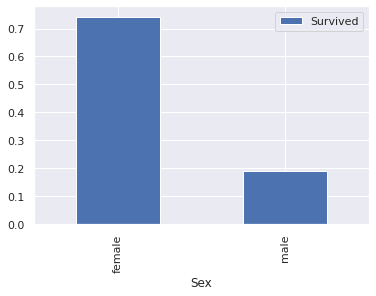

In [ ]:
pivot('Sex')

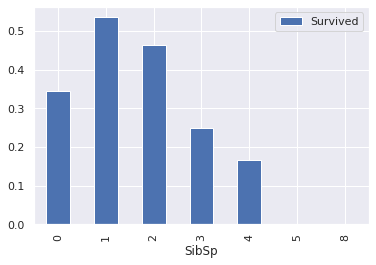

In [ ]:
pivot('SibSp')

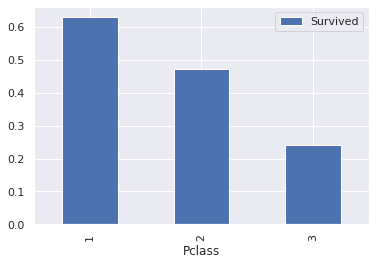

In [ ]:
pivot('Pclass')

In [ ]:
train_test_data = [train, test] # train test 데이터 합치기

for dataset in train_test_data :
  dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\. ', expand=False)
  # 이름에서 성별 확인 가능 단어 추출

In [ ]:
test['Title'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object>

In [ ]:
train['Title'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>

In [ ]:
title_mapping = {'Mr' : 0, 'Miss': 1, 'Mrs': 2, 
                 'Master': 3, 'Dr': 3, 'Rev' : 3, 
                 'Col' : 3, 'Ms' : 3, 'Mile' : 3, 
                 'Major' : 3, 'Lady' : 3, 'Capt' : 3,
                 'Sir' : 3, 'Don' : 3, 'Mme' : 3, 'Jonkheer' :3, 'Countess':3}

for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  # 성별요인들을 0~3가지로 매핑시키기

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64


In [ ]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64


In [ ]:
train['Title'].fillna(df['Title'].mean(), inplace=True)
test['Title'].fillna(df['Title'].mean(), inplace=True)
# 평균값으로 채우기

In [ ]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [ ]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [ ]:
df1 = train
df1['Age'].fillna(df1['Age'].median(), inplace=True)  

df2 = test
df2['Age'].fillna(df2['Age'].median(), inplace=True)

# 결측치를 중위값으로 처리

In [ ]:
train['Age'].isnull().sum()

0

In [ ]:
test['Age'].isnull().sum()

0

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')
# 빈값들 S로 넣기

In [ ]:
train['Embarked'][train['Embarked'] == 'S'] = 0
train['Embarked'][train['Embarked'] == 'C'] = 1
train['Embarked'][train['Embarked'] == 'Q'] = 2
# train 값 mapping 시키기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
test['Embarked'][test['Embarked'] == 'S'] = 0
test['Embarked'][test['Embarked'] == 'C'] = 1
test['Embarked'][test['Embarked'] == 'Q'] = 2
# test 값 mapping 시키기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
train.head() # Embarked 값 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0.0


In [ ]:
train['Embarked'].isnull().sum()

0

In [ ]:
test['Embarked'].isnull().sum()

0

In [ ]:
# fare 처리 - 평균값으로 채우기
test['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [ ]:
# Cabin, Name, PassengerId 처리 - 제거로 처리
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [ ]:
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [ ]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [ ]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,0,0.0
1,1,1,female,38.0,1,0,71.2833,1,2.0
2,1,3,female,26.0,0,0,7.9250,0,1.0
3,1,1,female,35.0,1,0,53.1000,0,2.0
4,0,3,male,35.0,0,0,8.0500,0,0.0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,2,0.0
1,3,female,47.0,1,0,7.0000,0,2.0
2,2,male,62.0,0,0,9.6875,2,0.0
3,3,male,27.0,0,0,8.6625,0,0.0
4,3,female,22.0,1,1,12.2875,0,2.0


In [ ]:
sex_mapping = {"male":0, "female":1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0.0
1,1,1,1,38.0,1,0,71.2833,1,2.0
2,1,3,1,26.0,0,0,7.9250,0,1.0
3,1,1,1,35.0,1,0,53.1000,0,2.0
4,0,3,0,35.0,0,0,8.0500,0,0.0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,0.0
1,3,1,47.0,1,0,7.0000,0,2.0
2,2,0,62.0,0,0,9.6875,2,0.0
3,3,0,27.0,0,0,8.6625,0,0.0
4,3,1,22.0,1,1,12.2875,0,2.0


In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

pred = train.drop(['Survived'], axis = 1)
target = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(pred, target, test_size = 0.3)
# 예측해야 될 것이 Survived이기 때문에 따로 떼어 예측함

In [ ]:
# 로지스틱 회귀: 83.58
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
acc_logr = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_logr)

83.58


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# 결정트리: 75.0
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_decisiontree)

75.0


In [ ]:
# 랜덤 포레스트: 82.46

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_randomforest)

81.34


In [ ]:
# KNN: 72.76

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_knn)

72.76


In [ ]:
# 총정리
models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score' : [acc_knn, acc_logr, acc_randomforest, acc_decisiontree]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,83.58
2,Random Forest,81.34
3,Decision Tree,75.00
0,KNN,72.76
